In [ ]:
#black friday dataset EDa and feature engineering
#black friday cleaning and preparing the data for

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7.0,B,2,1.0,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17.0,C,0,0.0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1.0,B,4+,1.0,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1.0,B,4+,1.0,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1.0,C,1,0.0,4.0,5.0,12.0


In [5]:

df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192426 entries, 0 to 192425
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     192426 non-null  int64  
 1   Product_ID                  192426 non-null  object 
 2   Gender                      192425 non-null  object 
 3   Age                         192425 non-null  object 
 4   Occupation                  192424 non-null  float64
 5   City_Category               192424 non-null  object 
 6   Stay_In_Current_City_Years  192424 non-null  object 
 7   Marital_Status              192424 non-null  float64
 8   Product_Category_1          192424 non-null  float64
 9   Product_Category_2          132664 non-null  float64
 10  Product_Category_3          58564 non-null   float64
 11  Purchase                    90353 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 17.6+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.924260e+05,192424.000000,192424.000000,192424.000000,132664.000000,58564.000000,90353.000000
mean,1.002884e+06,8.086881,0.410578,5.280428,9.853125,12.660440,9292.215732
std,1.751930e+03,6.532374,0.491940,3.735095,5.097531,4.121106,4963.411008
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001323e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5859.000000
50%,1.002859e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8050.000000
75%,1.004375e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12042.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [10]:
pd.get_dummies(df['Gender'],drop_first=1)

,M
0,False
1,False
2,False
3,False
4,True
...,...
192421,True
192422,True
192423,True
192424,False


In [11]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '46-',
       nan], dtype=object)

In [13]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
##second technqiue
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1, 7])

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,6,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [16]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [17]:
df = pd.concat([df, df_city], axis=1) # Pass df_city directly in the list
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,False,False
1,P00248942,0.0,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,False,False
2,P00087842,0.0,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,False,False
3,P00085442,0.0,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,False,False
4,P00285442,1.0,6,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,False,True


In [18]:
df.drop(['City_Category'],axis=1,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,2,0.0,3.0,NaN,NaN,8370.0,False,False
1,P00248942,0.0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,False,False
2,P00087842,0.0,0,10.0,2,0.0,12.0,NaN,NaN,1422.0,False,False
3,P00085442,0.0,0,10.0,2,0.0,12.0,14.0,NaN,1057.0,False,False
4,P00285442,1.0,6,16.0,4+,0.0,8.0,NaN,NaN,7969.0,False,True


In [20]:
#missing values
df.isnull().sum()

,0
Product_ID,0
Gender,1
Age,0
Occupation,2
Stay_In_Current_City_Years,2
Marital_Status,2
Product_Category_1,2
Product_Category_2,59762
Product_Category_3,133862
Purchase,102073


In [21]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,22241
14.0,19588
2.0,17486
16.0,15275
15.0,13220
5.0,9199
4.0,9009
6.0,5842
11.0,4949


In [23]:
df['Product_Category_2'].mode()[0]

8.0

In [24]:
#replacing the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].isnull().sum()

0

In [26]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,11398
15.0,9878
14.0,6498
17.0,5868
5.0,5865
8.0,4379
9.0,4127
12.0,3241
13.0,1914


In [28]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df['Product_Category_3'].isnull().sum()

0

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,2,0.0,3.0,8.0,16.0,8370.0,False,False
1,P00248942,0.0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,False,False
2,P00087842,0.0,0,10.0,2,0.0,12.0,8.0,16.0,1422.0,False,False
3,P00085442,0.0,0,10.0,2,0.0,12.0,14.0,16.0,1057.0,False,False
4,P00285442,1.0,6,16.0,4+,0.0,8.0,8.0,16.0,7969.0,False,True


In [31]:
#stay in current years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [32]:
df['Stay_In_Current_City_Years'].str.replace('+','')

,Stay_In_Current_City_Years
0,2
1,2
2,2
3,2
4,4
...,...
192421,0
192422,0
192423,1
192424,3


In [34]:
#converting marital status with ys or no from 0 and 1
df['Marital_Status'].unique()


array(['No', 'Yes', nan], dtype=object)

In [33]:
#converting marital status with ys or no from 0 and 1
df['Marital_Status']=df['Marital_Status'].map({0:'No',1:'Yes'})
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,2,No,3.0,8.0,16.0,8370.0,False,False
1,P00248942,0.0,0,10.0,2,No,1.0,6.0,14.0,15200.0,False,False
2,P00087842,0.0,0,10.0,2,No,12.0,8.0,16.0,1422.0,False,False
3,P00085442,0.0,0,10.0,2,No,12.0,14.0,16.0,1057.0,False,False
4,P00285442,1.0,6,16.0,4+,No,8.0,8.0,16.0,7969.0,False,True


In [37]:
df.columns


Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [40]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '', regex=False) # Replace '+' with an empty string
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors='coerce').fillna(0).astype(int) # Convert the column to numeric, handle errors, fill NaN with 0, then convert to int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192426 entries, 0 to 192425
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  192426 non-null  object 
 1   Gender                      192425 non-null  float64
 2   Age                         192426 non-null  int64  
 3   Occupation                  192424 non-null  float64
 4   Stay_In_Current_City_Years  192426 non-null  int64  
 5   Marital_Status              192424 non-null  object 
 6   Product_Category_1          192424 non-null  float64
 7   Product_Category_2          192426 non-null  float64
 8   Product_Category_3          192426 non-null  float64
 9   Purchase                    90353 non-null   float64
 10  B                           192426 non-null  bool   
 11  C                           192426 non-null  bool   
dtypes: bool(2), float64(6), int64(2), object(2)
memory usage: 15.0+ MB


In [42]:
df['B'] = df['B'].astype(int)

In [43]:
df['C'] = df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192426 entries, 0 to 192425
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  192426 non-null  object 
 1   Gender                      192425 non-null  float64
 2   Age                         192426 non-null  int64  
 3   Occupation                  192424 non-null  float64
 4   Stay_In_Current_City_Years  192426 non-null  int64  
 5   Marital_Status              192424 non-null  object 
 6   Product_Category_1          192424 non-null  float64
 7   Product_Category_2          192426 non-null  float64
 8   Product_Category_3          192426 non-null  float64
 9   Purchase                    90353 non-null   float64
 10  B                           192426 non-null  int64  
 11  C                           192426 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 17.6+ MB


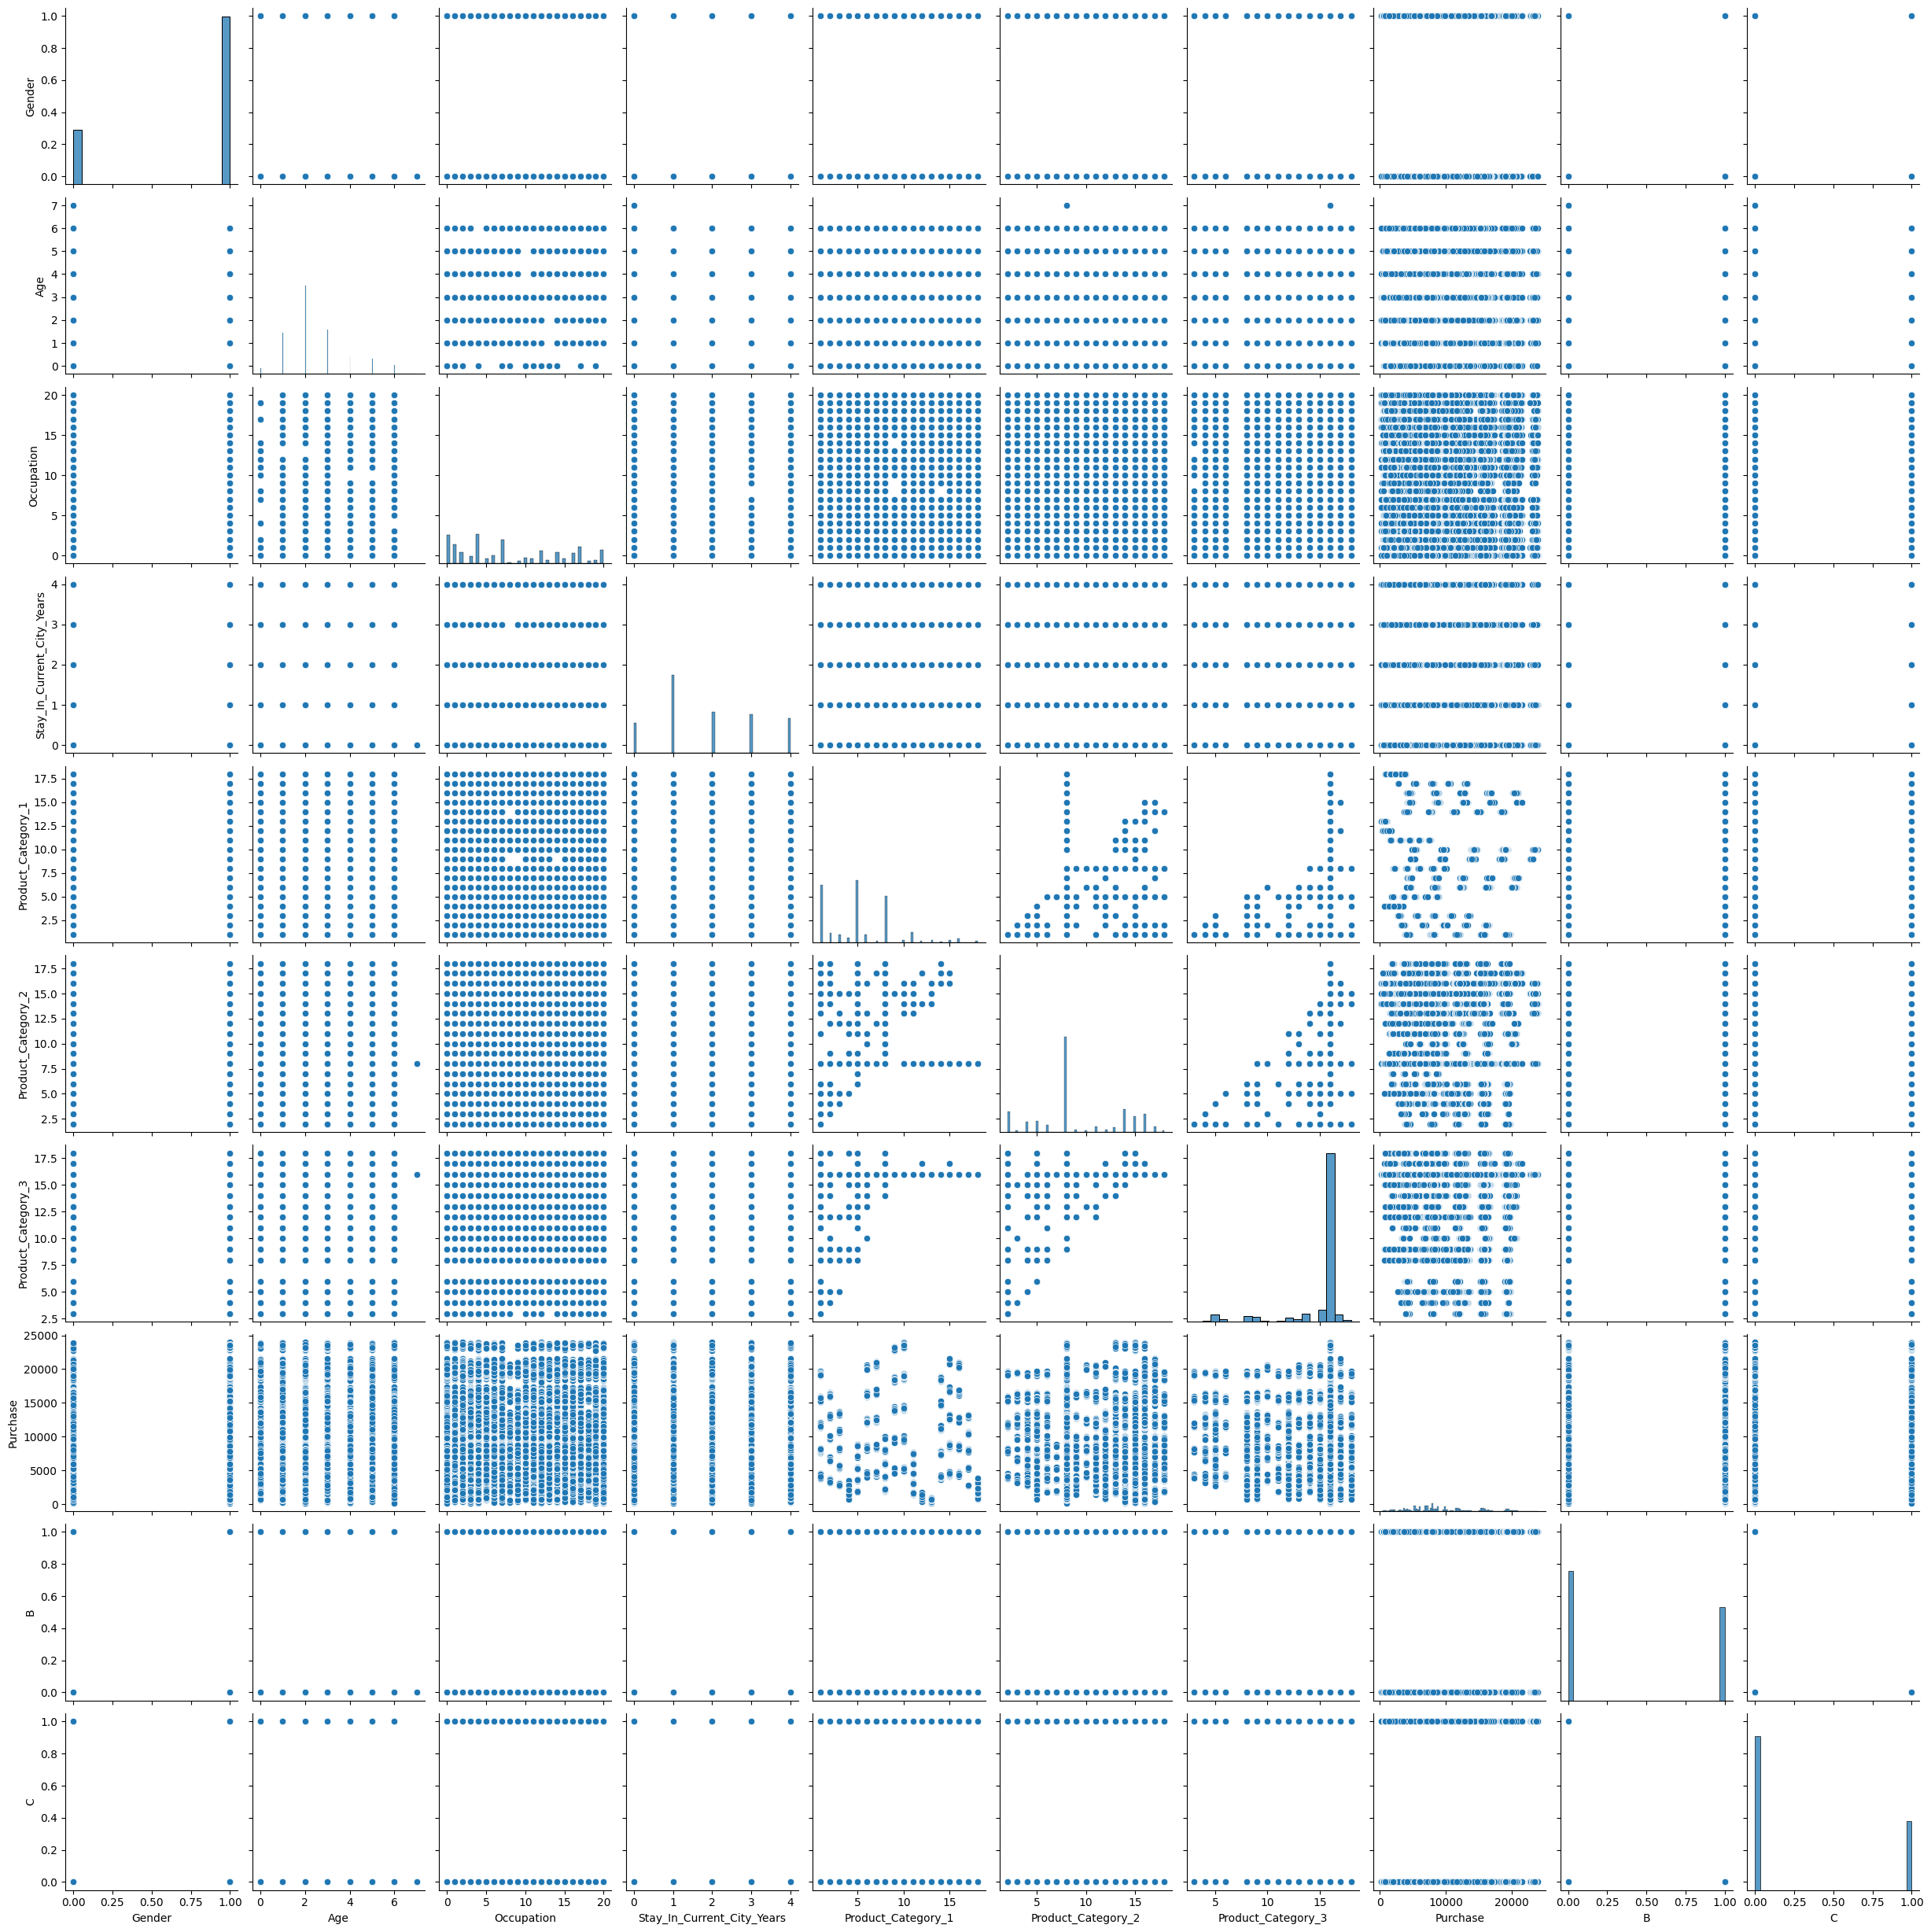

In [44]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

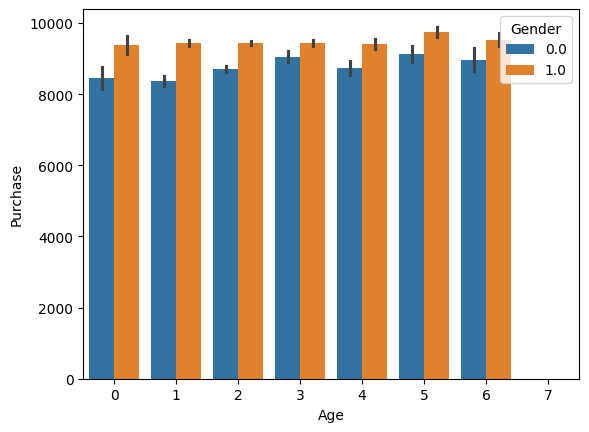

In [48]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

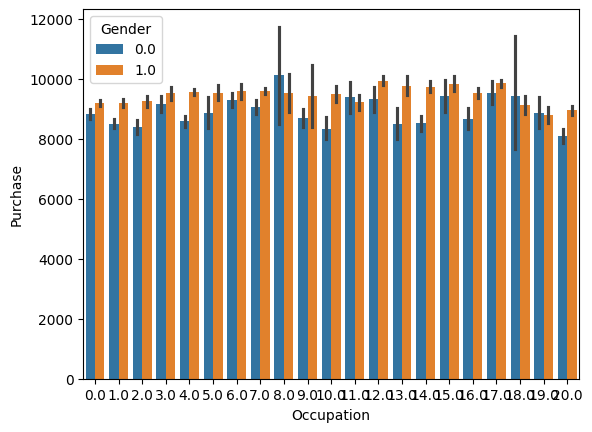

In [49]:
#purchasing of men is high then women
#with occupation
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

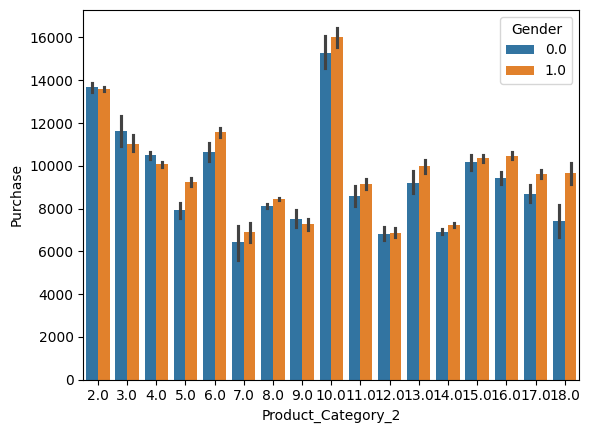

In [50]:
#prdt catroty 2
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

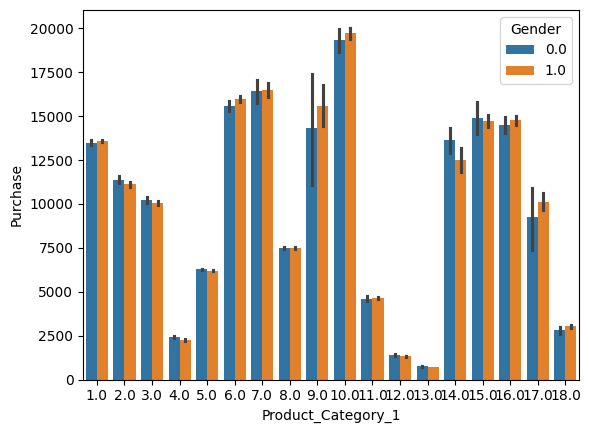

In [51]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

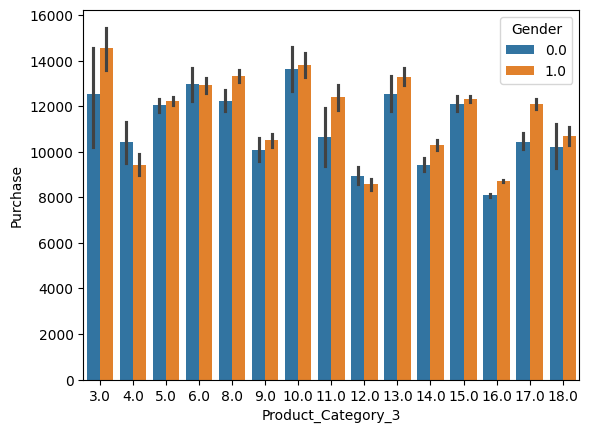

In [52]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [54]:
#feature scaling
df_test=df[df['Purchase'].isnull()]


In [56]:

df_train=df[~df['Purchase'].isnull()]

In [59]:
from os import XATTR_SIZE_MAX
X=df_train.drop('Purchase',axis=1)
print(X.head())
y=df_train['Purchase']
print(y.head())

  Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0  P00069042     0.0    0        10.0                           2   
1  P00248942     0.0    0        10.0                           2   
2  P00087842     0.0    0        10.0                           2   
3  P00085442     0.0    0        10.0                           2   
4  P00285442     1.0    6        16.0                           4   

  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0             No                 3.0                 8.0                16.0   
1             No                 1.0                 6.0                14.0   
2             No                12.0                 8.0                16.0   
3             No                12.0                14.0                16.0   
4             No                 8.0                 8.0                16.0   

   B  C  
0  0  0  
1  0  0  
2  0  0  
3  0  0  
4  0  1  
0     8370.0
1    15200.0
2     1422.0
3    

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [61]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_train['Purchase']=sc.fit_transform(df_train[['Purchase']])

<ipython-input-61-fa87a0d3e49b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Purchase']=sc.fit_transform(df_train[['Purchase']])
